**PROBLEM 5**

DAYANANDASHABARI S - 22BTRCL045

Percentage of missing values before filling data 
 District code                    0.00000
State name                       0.00000
District name                    0.00000
Population                       4.68750
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Power_Parity               5.00000
Length: 118, dtype: float64
Percentage of missing values after filling data 
 District code                    0.00000
State name                       0.00000
District name                    0.00000
Population                       0.00000
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Powe

<ipython-input-12-ffe06d041589>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


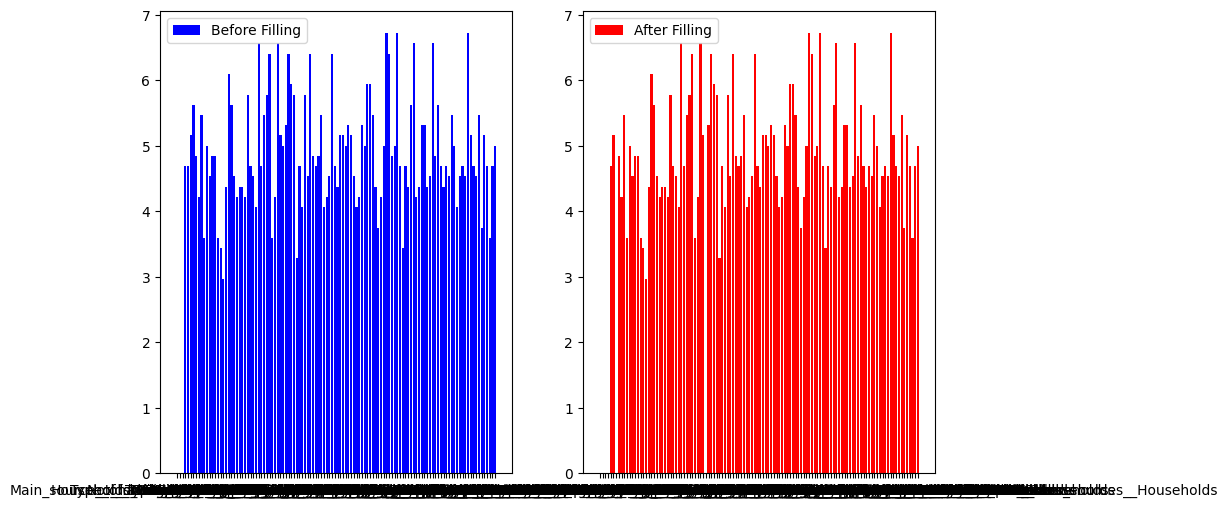

     District code                   State name              District name  \
0                1            JAMMU AND KASHMIR                    Kupwara   
1                2            JAMMU AND KASHMIR                     Badgam   
2                3            JAMMU AND KASHMIR                Leh(Ladakh)   
3                4            JAMMU AND KASHMIR                     Kargil   
4                5            JAMMU AND KASHMIR                      Punch   
..             ...                          ...                        ...   
635            636                  PONDICHERRY                       Mahe   
636            637                  PONDICHERRY                   Karaikal   
637            638  ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
638            639  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
639            640  ANDAMAN AND NICOBAR ISLANDS              South Andaman   

     Population      Male    Female  Literate  Male_Literate  F

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def fill_missing_with_sum(input_file, output_file, fill_dict):
  df = pd.read_csv(input_file)
  missing_percentages_before = (df.isnull().sum() / len(df)) * 100
  print("Percentage of missing values before filling data \n", missing_percentages_before)

  for i, j in fill_dict.items():
    df[i].fillna(df[j].sum(axis=1), inplace=True)

  df.to_csv(output_file, index=False)
  new_df = pd.read_csv(output_file)

  missing_percentages_after = (new_df.isnull().sum() / len(df)) * 100
  print("Percentage of missing values after filling data \n", missing_percentages_after)

  plt.figure(figsize=(10, 6))
  plt.title(f'Missing Value Comparison Before and After')
  plt.subplot(1, 2, 1)
  plt.bar(missing_percentages_before.index, missing_percentages_before, color='blue', label='Before Filling')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.bar(missing_percentages_after.index, missing_percentages_after, color='red', label='After Filling')
  plt.legend()
  plt.show()

  return df

input_file = 'census_2011.csv'
output_file = 'Clean_data.csv'
fill_dict = {'Population': ['Male', 'Female'],
             'Literate': ['Male_Literate', 'Female_Literate'],
             'Population': ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50', 'Age not stated'],
             'Households': ['Rural_Households', 'Urban_Households']}

filled_df = fill_missing_with_sum(input_file, output_file, fill_dict)
print(filled_df)


**PROBLEM 6**

VISHNU - 22BTRCL169

In [ ]:
import pandas as pd
import os

# Assuming your raw census data is in a CSV file named "census_2011.csv"
data = pd.read_csv("census_2011.csv")

# Function to calculate missing data percentage (optional, can be removed)
def missing_data_percentage(column):
    """Calculates the percentage of missing values in a column.

    Args:
        column (pandas.Series): The column to calculate missing data percentage for.

    Returns:
        float: The percentage of missing values in the column.
    """

    missing_count = column.isnull().sum()
    total_count = len(column)
    return (missing_count / total_count) * 100

# Process census data (replace with your specific logic)
# You can uncomment the missing data percentage function and use it here
# to calculate and analyze missing data before filling

# Fill missing data using logical derivations
data["Population"] = data["Male"] + data["Female"]
data["Literate"] = data["Male_Literate"] + data["Female_Literate"]
data["Population"] = (
    data["Age_Group_0_29"]
    + data["Age_Group_30_49"]
    + data["Age_Group_50"]
    + data["Age not stated"]
)
data["Households"] = data["Rural_Households"] + data["Urban_Households"]

# Processed data to be saved
df_filled = data

# Check if the 'Clean_Data' folder exists
if not os.path.exists("Clean_Data"):
    os.makedirs("Clean_Data")

# Save processed data
df_filled.to_csv("Clean_Data/census.csv", index=False)
print("Processed data saved to Clean_Data/census.csv")



Processed data saved to Clean_Data/census.csv


**PROBLEM 7**

DAYANANDASHABARI S - 22BTRCL045

In [ ]:
import os
import pandas as pd

# Step 1: Read the housing data
housing_data = pd.read_csv("housing.csv")

# Step 2: Extract relevant columns
relevant_columns = ['District Name', 'Rural/Urban', 'Total Number of households',
                    'Total Number of Livable', 'Total Number of Dilapidated', 'Latrine_premise']
housing_relevant = housing_data[relevant_columns].copy()

# Step 3: Calculating absolute values for Total Number of Dilapidated and Latrine_premise
housing_relevant['Households'] = housing_relevant['Total Number of households']
housing_relevant['Households_Rural_Dilapidated'] = (housing_relevant['Total Number of Dilapidated'] / 100) * housing_relevant['Households']
housing_relevant['Households_Urban_Dilapidated'] = housing_relevant['Households'] - housing_relevant['Households_Rural_Dilapidated']
housing_relevant['Households_Rural_Toilet_Premise'] = (housing_relevant['Latrine_premise'] / 100) * housing_relevant['Households']
housing_relevant['Households_Urban_Toilet_Premise'] = housing_relevant['Households'] - housing_relevant['Households_Rural_Toilet_Premise']

# Step 4: Rename the columns
housing_relevant.rename(columns={
    'Total Number of households': 'Households_Rural',
    'Total Number of Livable': 'Households_Rural_Livable',
    'Latrine_premise': 'Households_Rural_Toilet_Premise'
}, inplace=True)

housing_relevant.rename(columns={
    'Households': 'Households_Urban',
    'Total Number of Livable': 'Households_Urban_Livable',
    'Latrine_premise': 'Households_Urban_Toilet_Premise'
}, inplace=True)

# Step 5: Creating the directory if it doesn't exist
directory = 'Clean_Data'
if not os.path.exists(directory):
    os.makedirs(directory)

# Step 6: Save the processed data into a CSV file
housing_relevant.to_csv("Clean_Data/housing_processed.csv", index=False)

**PROBLEM 8**

SURAJ J - 22BTRCL153

Housing Data Columns:
Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

Census Data Columns:
Index(['District code', 'State name', 'District Name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_5450

<ipython-input-2-81863d5041af>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_data['Households per 100 people'] = (urban_data['Total Number of households'] / urban_data['Population']) * 100
<ipython-input-2-81863d5041af>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural_data['Households per 100 people'] = (rural_data['Total Number of households'] / rural_data['Population']) * 100
<ipython-input-2-81863d5041af>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

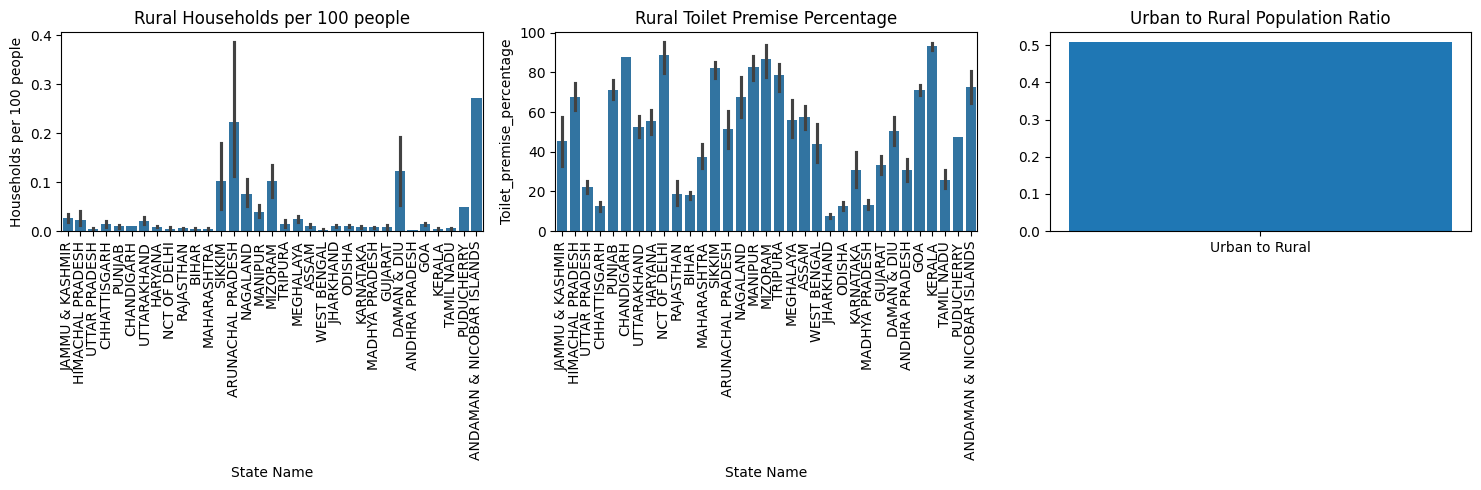

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

housing_data = pd.read_csv('housing.csv')
census_data = pd.read_csv('census_2011.csv')
census_data.rename(columns={'District name': 'District Name'}, inplace=True)

print("Housing Data Columns:")
print(housing_data.columns)
print("\nCensus Data Columns:")
print(census_data.columns)

merged_data = pd.merge(housing_data, census_data, on='District Name')
print("\nMerged Data:")
print(merged_data.head())

merged_data['Absolute Dilapidated Rural'] = merged_data['Total Number of households'] * (merged_data['Total Number of Dilapidated'] / 100)
merged_data['Absolute Latrine_premise Rural'] = merged_data['Total Number of households'] * (merged_data['Latrine_premise'] / 100)
merged_data['Absolute Dilapidated Urban'] = merged_data['Total Number of households'] * ((100 - merged_data['Total Number of Livable']) / 100)
merged_data['Absolute Latrine_premise Urban'] = merged_data['Total Number of households'] * ((100 - merged_data['Latrine_premise']) / 100)

print(merged_data.head())

# Filter data for Urban and Rural separately
urban_data = merged_data[merged_data['Rural/Urban'] == 'Urban']
rural_data = merged_data[merged_data['Rural/Urban'] == 'Rural']

# Number of households for 100 people
urban_data['Households per 100 people'] = (urban_data['Total Number of households'] / urban_data['Population']) * 100
rural_data['Households per 100 people'] = (rural_data['Total Number of households'] / rural_data['Population']) * 100

# Percentage of households with toilet(s) in premise
urban_data['Toilet_premise_percentage'] = (urban_data['Latrine_premise'] / urban_data['Total Number of households']) * 100
rural_data['Toilet_premise_percentage'] = (rural_data['Latrine_premise'] / rural_data['Total Number of households']) * 100

# Urban to rural population ratio
urban_to_rural_ratio = urban_data['Urban_Households'].sum() / rural_data['Rural_Households'].sum()

plt.figure(figsize=(15, 5))

#Number of households for 100 people
plt.subplot(1, 3, 1)
sns.barplot(x='State Name', y='Households per 100 people', data=rural_data)
plt.xticks(rotation=90)
plt.title('Rural Households per 100 people')

#Percentage of households with toilet(s) in premise
plt.subplot(1, 3, 2)
sns.barplot(x='State Name', y='Toilet_premise_percentage', data=rural_data)
plt.xticks(rotation=90)
plt.title('Rural Toilet Premise Percentage')

#Urban to rural population ratio
plt.subplot(1, 3, 3)
plt.bar(['Urban to Rural'], [urban_to_rural_ratio])
plt.title('Urban to Rural Population Ratio')

plt.tight_layout()
plt.show()

**PROBLEM 9**

GUNJ CHARAN WAGHMARE - 22BTRCL058

In [ ]:
import pandas as pd

# Read the housing data
housing_data = pd.read_csv("housing.csv", usecols=['District Name', 'Rural/Urban', 'Total Number of households'])

# Read the census data
census_data = pd.read_csv("Clean_Data/census.csv", usecols=['District name', 'Rural_Households', 'Urban_Households'])

# Merge the two datasets on the district name
merged_data = pd.merge(housing_data, census_data, left_on='District Name', right_on='District name', how='inner')

# Calculate the percentage difference between Households_Rural and Households_Urban
merged_data['Difference'] = abs(merged_data['Total Number of households'] - merged_data['Rural_Households']) / merged_data['Total Number of households'] * 100

# Identify districts where the percentage difference exceeds 10%
major_difference_districts = merged_data[merged_data['Difference'] > 10]['District Name'].unique()

# Report the names of districts with major differences
if len(major_difference_districts) > 0:
    print("Districts with major differences (more than 10%) between Households_Rural and Households_Urban:")
    for district in major_difference_districts:
        print(district)
else:
    print("No districts with major differences (more than 10%) between Households_Rural and Households_Urban found.")



Districts with major differences (more than 10%) between Households_Rural and Households_Urban:
Kupwara
Badgam
Leh(Ladakh)
Kargil
Punch
Rajouri
Kathua
Baramula
Bandipore
Srinagar
Ganderbal
Pulwama
Shupiyan
Anantnag
Kulgam
Doda
Ramban
Kishtwar
Udhampur
Reasi
Jammu
Samba
Chamba
Kangra
Kullu
Mandi
Hamirpur
Una
Bilaspur
Solan
Sirmaur
Shimla
Kinnaur
Gurdaspur
Kapurthala
Jalandhar
Hoshiarpur
Shahid Bhagat Singh Nagar
Fatehgarh Sahib
Ludhiana
Moga
Firozpur
Muktsar
Faridkot
Bathinda
Mansa
Patiala
Amritsar
Tarn Taran
Rupnagar
Sahibzada Ajit Singh Nagar
Sangrur
Barnala
Chandigarh
Uttarkashi
Chamoli
Rudraprayag
Tehri Garhwal
Dehradun
Garhwal
Pithoragarh
Bageshwar
Almora
Champawat
Nainital
Udham Singh Nagar
Hardwar
Panchkula
Ambala
Yamunanagar
Kurukshetra
Kaithal
Karnal
Panipat
Jind
Fatehabad
Sirsa
Bhiwani
Jhajjar
Mahendragarh
Rewari
Gurgaon
Mewat
Faridabad
Palwal
North West
North
North East
East
New Delhi
Central
West
South West
South
Ganganagar
Hanumangarh
Bikaner
Churu
Jhunjhunun
Alwar
Dhaulpur